# Student Performance in Exams
- name: 黃振宏
- id: E14046402
- department: 機械系
- data:
    - https://www.kaggle.com/spscientist/students-performance-in-exams#StudentsPerformance.csv
    -

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd_data = pd.read_csv('./StudentsPerformance.csv')
pd_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 看每個attribute的domain

In [2]:
count_gender = pd_data['gender'].value_counts()
count_race = pd_data['race/ethnicity'].value_counts()
count_education = pd_data['parental level of education'].value_counts()
count_lunch = pd_data['lunch'].value_counts()
count_course = pd_data['test preparation course'].value_counts()

# 性別分佈

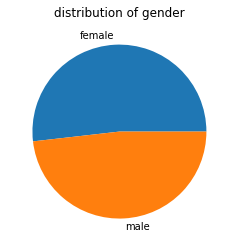

In [3]:
# gender分佈
plt.title('distribution of gender')
plt.pie(count_gender.to_list(), labels=count_gender.index.values.tolist())
plt.show()

# 種族分佈

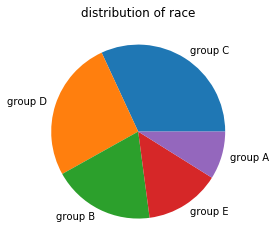

In [4]:
# race分佈
plt.title('distribution of race')
plt.pie(count_race.to_list(), labels=count_race.index.values.tolist())
plt.show()

# 教育分佈

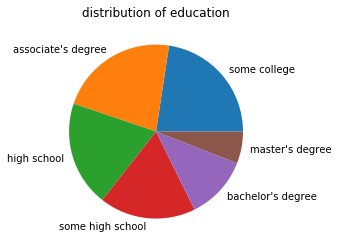

In [5]:
# education分佈
plt.title('distribution of education')
plt.pie(count_education.to_list(), labels=count_education.index.values.tolist())
plt.show()

# 午餐

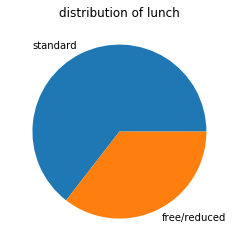

In [6]:
# lunch分佈
plt.title('distribution of lunch')
plt.pie(count_lunch.to_list(), labels=count_lunch.index.values.tolist())
plt.show()

# 是否有上完課程

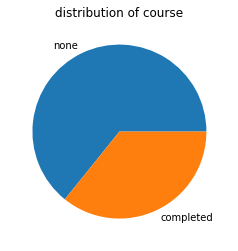

In [7]:
# course分佈
plt.title('distribution of course')
plt.pie(count_course.to_list(), labels=count_course.index.values.tolist())
plt.show()

# 數學分數分佈

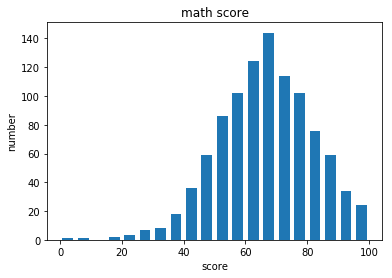

In [8]:
plt.hist(x=pd_data['math score'], bins=20, rwidth=0.7)
plt.title('math score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 閱讀分數分佈

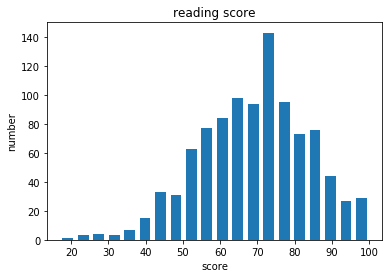

In [9]:
plt.hist(x=pd_data['reading score'], bins=20, rwidth=0.7)
plt.title('reading score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 手寫分數分佈

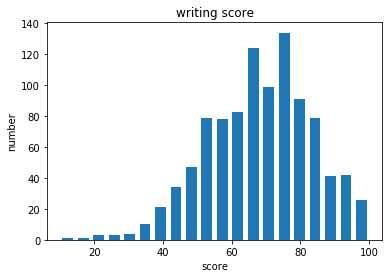

In [10]:
plt.hist(x=pd_data['writing score'], bins=20, rwidth=0.7)
plt.title('writing score')
plt.xlabel('score')
plt.ylabel('number')
plt.show()

# 將資料數值化
- genger
    - female: 0
    - male: 1
    
- race/ethnicity
    - group A: 0
    - group B: 1
    - group C: 2
    - group D: 3
    - group E: 4
    
- parental level of education
    - some high school: 0 (讀high school，但沒有畢業)
    - high school: 1
    - some college: 2 (讀學士，但沒有畢業)
    - associate's degree: 3 (副學士)
    - bachelor's degree: 4 (學士)
    - master's degree: 5
    
- lunch
    - free/reduced: 0
    - standard: 1

- test preparation course
    - none: 0
    - completed: 1

In [11]:
# gender mapping (female: 0, male: 1)
def gender_map(text):
    if text == 'female':
        return 0
    elif text == 'male':
        return 1
    else:
        return -1

# race mapping
def race_map(text):
    if text == 'group A':
        return 0
    elif text == 'group B':
        return 1
    elif text == 'group C':
        return 2
    elif text == 'group D':
        return 3
    elif text == 'group E':
        return 4
    else: 
        return -1 
    
# education mapping
def education_map(text):
    if text == "some high school":
        return 0
    elif text == "high school":
        return 1
    elif text == "some college":
        return 2
    elif text == "associate's degree":
        return 3
    elif text == "bachelor's degree":
        return 4
    elif text == "master's degree":
        return 5
    else:
        return -1

# lunch mapping
def lunch_map(text):
    if text == "free/reduced":
        return 0
    elif text == "standard":
        return 1
    else:
        return -1

# course mapping
def course_map(text):
    if text == 'none':
        return 0
    elif text == 'completed':
        return 1
    else:
        return -1 
    
# data numeralization
num_data = pd_data.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
num_data['gender'] = pd_data['gender'].apply(gender_map) 
num_data['race'] = pd_data['race/ethnicity'].apply(race_map) 
num_data['education'] = pd_data['parental level of education'].apply(education_map)
num_data['lunch'] = pd_data['lunch'].apply(lunch_map)
num_data['course'] = pd_data['test preparation course'].apply(course_map)

# Heat Map

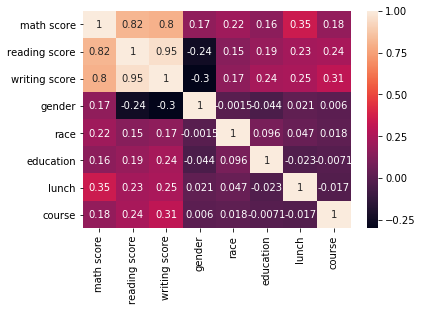

In [12]:
heatMap = sns.heatmap(num_data.corr(), annot=True)

# 教育程度的考試分佈

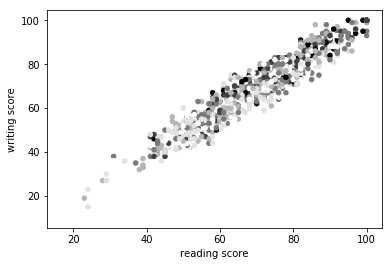

In [13]:
def color_map(num):
    if num == 0:
        return 'red'
    elif num == 1:
        return 'green'
    elif num == 2:
        return 'b'
    else:
        return 'y'
    
color_data = num_data.drop(['gender', 'race', 'education', 'lunch', 'course'], axis=1)
color_data['gender'] = num_data['gender'].apply(color_map)

color_data.plot.scatter(x='reading score', y='writing score', c=num_data['education']) 
